# Air Quality Forecast: Machine Learning Model

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Reading and exploring the Health Care Dataset

In [21]:
df = pd.read_csv(r'dataset\air quality data.csv')

## ANALYZING THE DATASET
- Size, data types, null value rate, statistical information for each column

In [22]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [23]:
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [24]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [25]:
df.axes

[RangeIndex(start=0, stop=29531, step=1),
 Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
        'Benzene', 'Toluene', 'Xylene', 'AQI'],
       dtype='object')]

In [26]:
df.describe

<bound method NDFrame.describe of                 City  PM2.5   PM10     NO  ...  Benzene  Toluene  Xylene   AQI
0          Ahmedabad    NaN    NaN   0.92  ...     0.00     0.02    0.00   NaN
1          Ahmedabad    NaN    NaN   0.97  ...     3.68     5.50    3.77   NaN
2          Ahmedabad    NaN    NaN  17.40  ...     6.80    16.40    2.25   NaN
3          Ahmedabad    NaN    NaN   1.70  ...     4.43    10.14    1.00   NaN
4          Ahmedabad    NaN    NaN  22.10  ...     7.01    18.89    2.78   NaN
...              ...    ...    ...    ...  ...      ...      ...     ...   ...
29526  Visakhapatnam  15.02  50.94   7.68  ...     2.24    12.07    0.73  41.0
29527  Visakhapatnam  24.38  74.09   3.42  ...     0.74     2.21    0.38  70.0
29528  Visakhapatnam  22.91  65.73   3.45  ...     0.01     0.01    0.00  68.0
29529  Visakhapatnam  16.64  49.97   4.05  ...     0.00     0.00    0.00  54.0
29530  Visakhapatnam  15.00  66.00   0.40  ...      NaN      NaN     NaN  50.0

[29531 rows x 14 

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [28]:
df.shape

(29531, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [32]:
df.count()

City       29531
PM2.5      24933
PM10       18391
NO         25949
NO2        25946
NOx        25346
NH3        19203
CO         27472
SO2        25677
O3         25509
Benzene    23908
Toluene    21490
Xylene     11422
AQI        24850
dtype: int64

In [19]:
df.count().sum()

np.int64(329627)

In [30]:
df.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [31]:
df.isnull().sum().sum()

np.int64(83807)

there are a lot of missing values

In [38]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29526    False
29527    False
29528    False
29529    False
29530    False
Length: 29531, dtype: bool

In [35]:
df.duplicated().sum()

np.int64(2297)

In [40]:
# Drop rows where the 'AQI' column has missing values
df1 = df.dropna(subset=['AQI'], inplace=True)

In [41]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [42]:
df.shape

(24850, 14)

In [43]:
# Summary Statistics for the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [44]:
# in this DataFrame and the percentage of these null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

## Key Considerations:
- Xylene has the highest percentage of missing values(61.86%), so you'll need to decide whether to impute these values or drop the column

## Now we will start our Data Exploration using Visualization

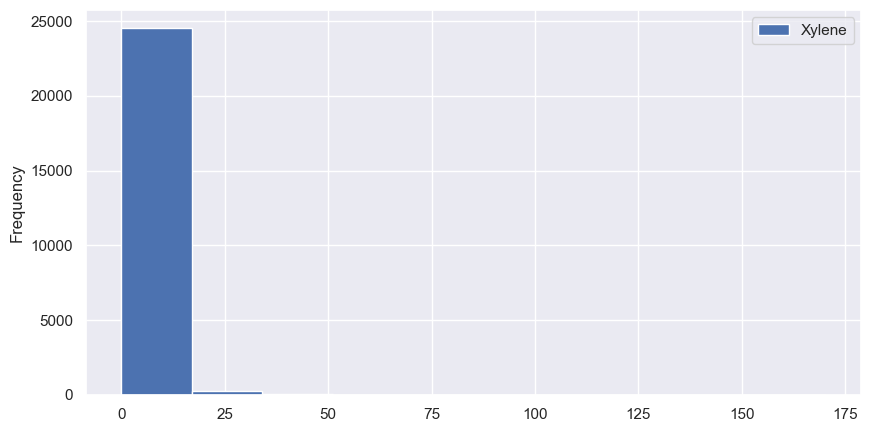

In [79]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

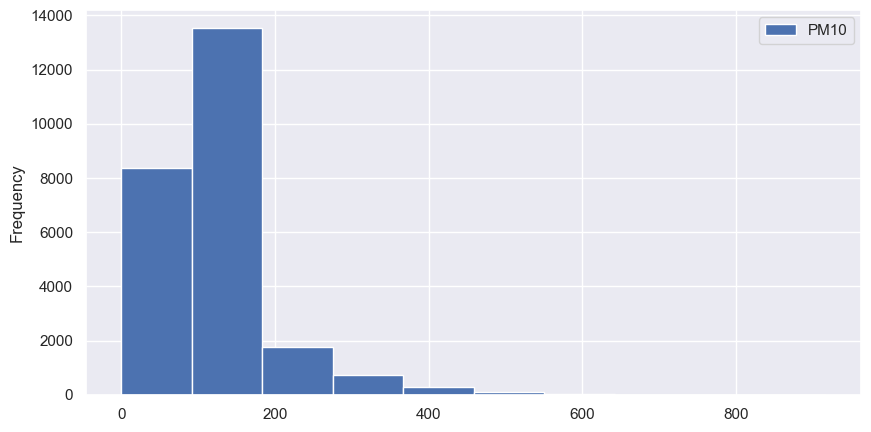

In [80]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

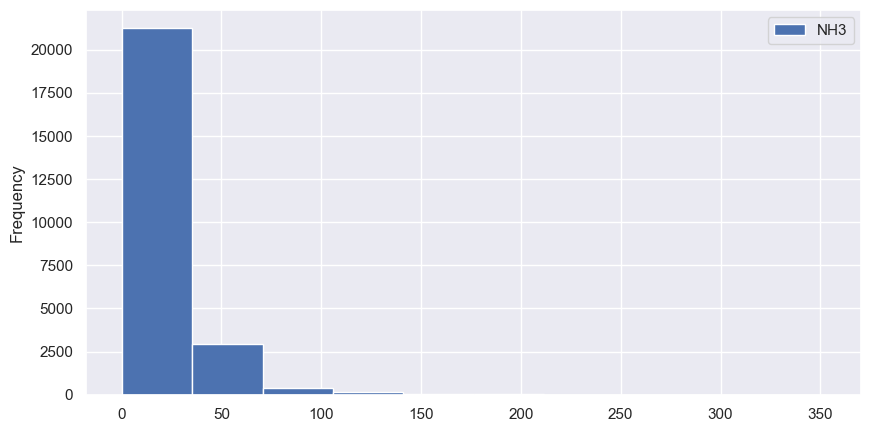

In [81]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

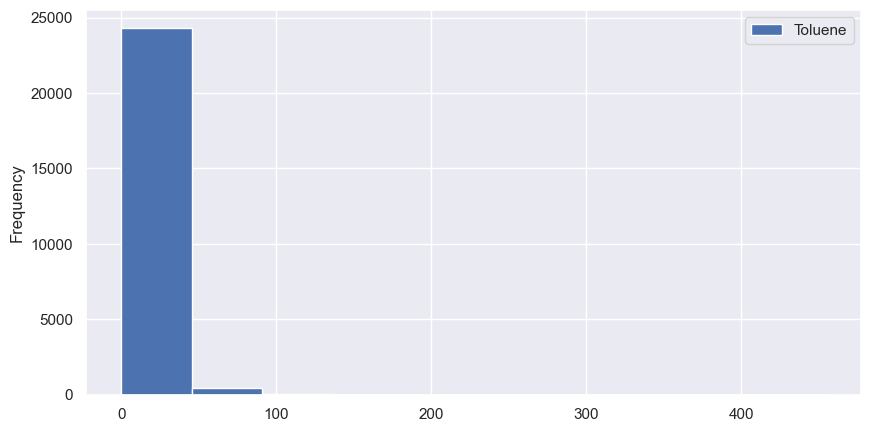

In [82]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

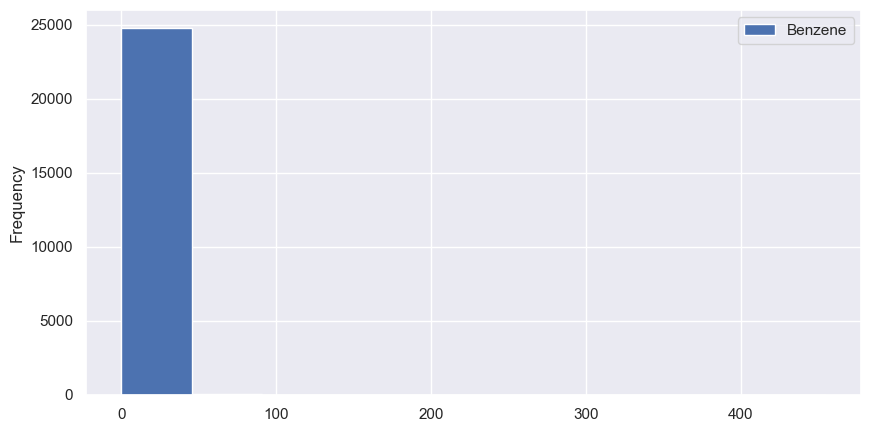

In [83]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

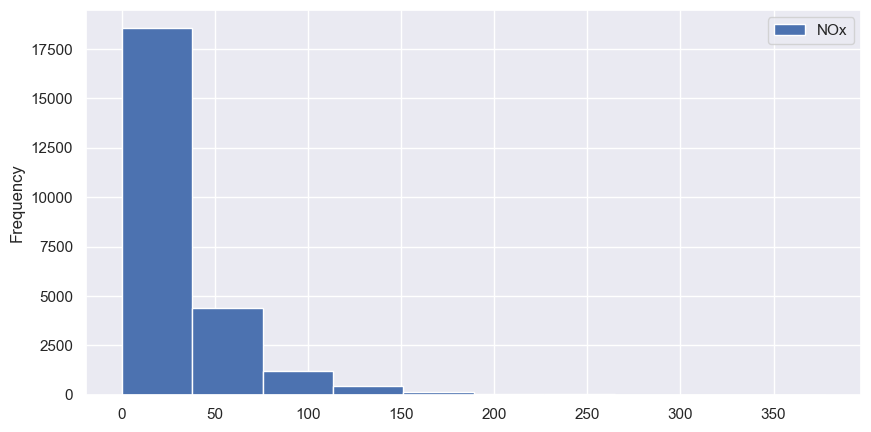

In [84]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

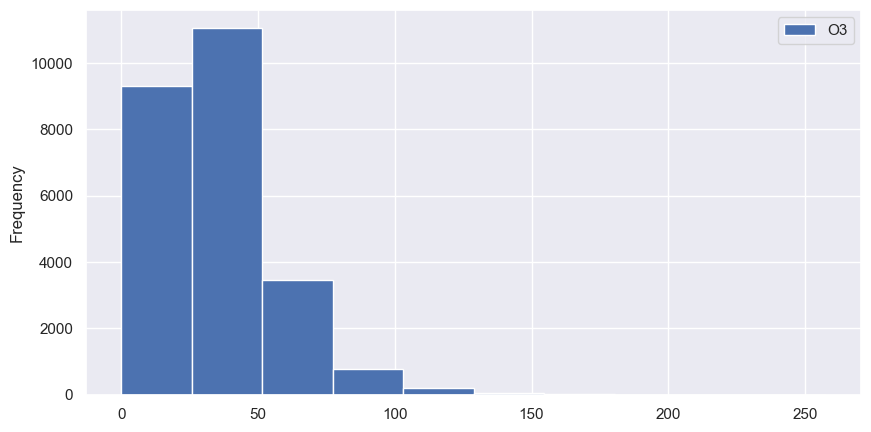

In [85]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

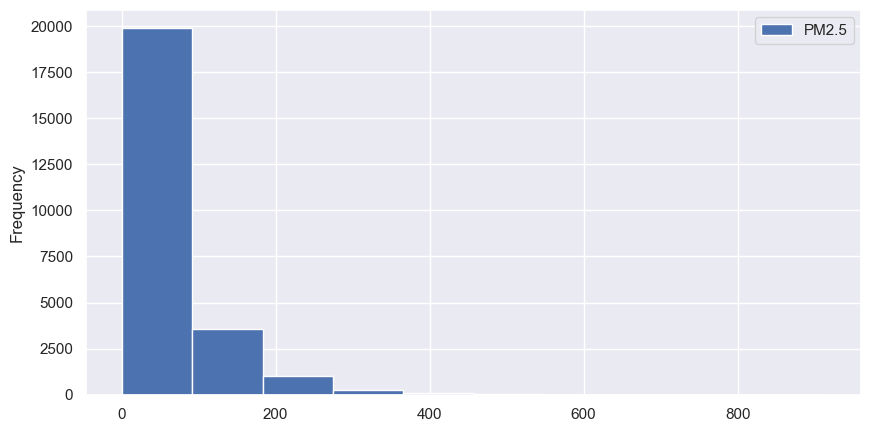

In [86]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

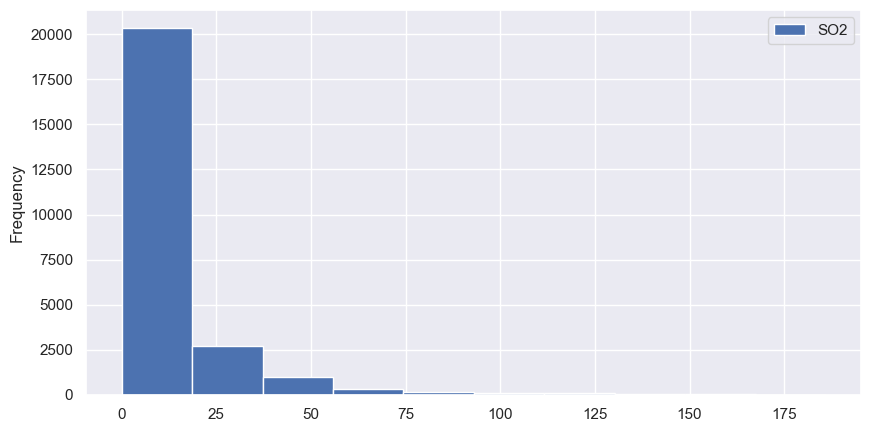

In [87]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

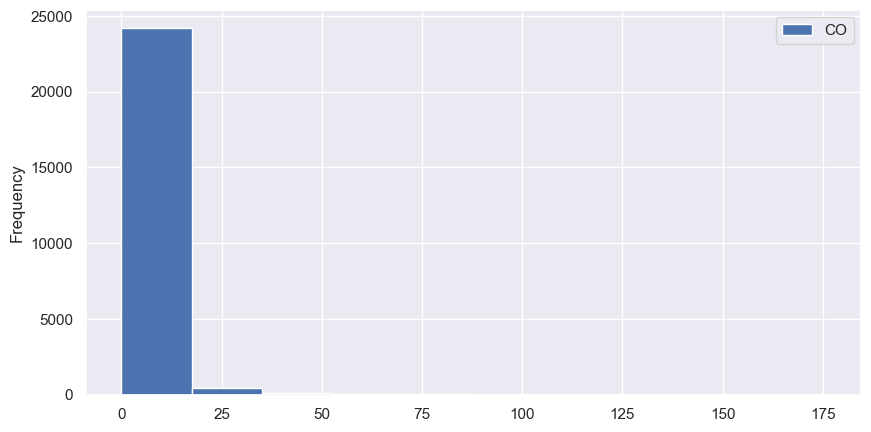

In [88]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

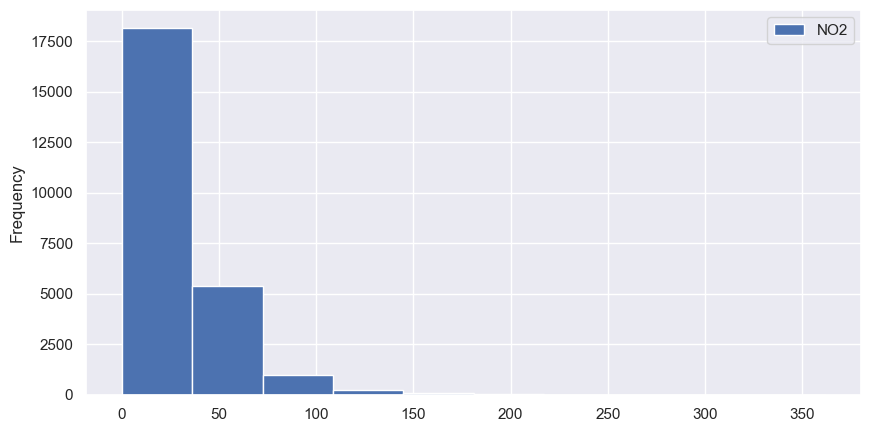

In [89]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

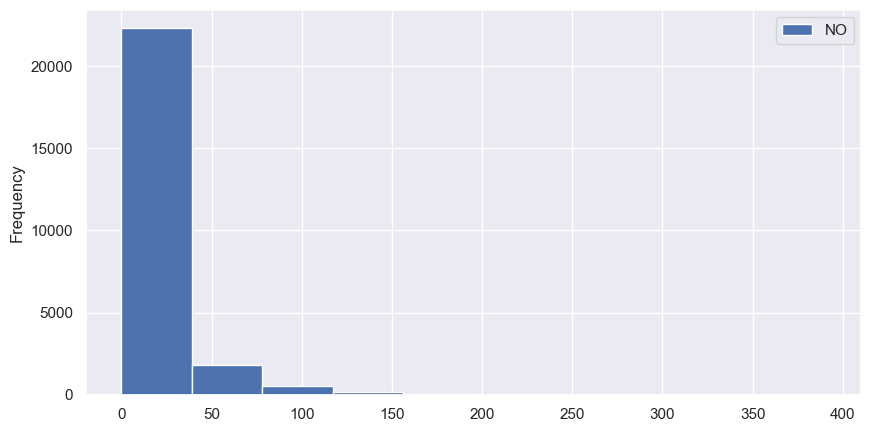

In [90]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

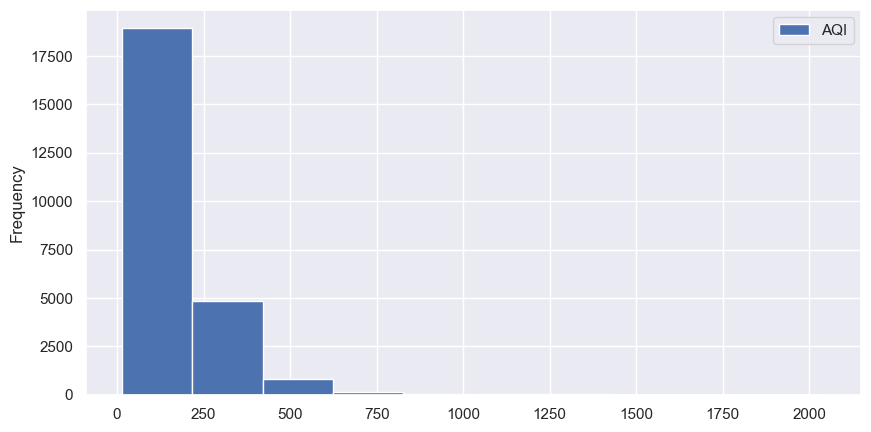

In [91]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

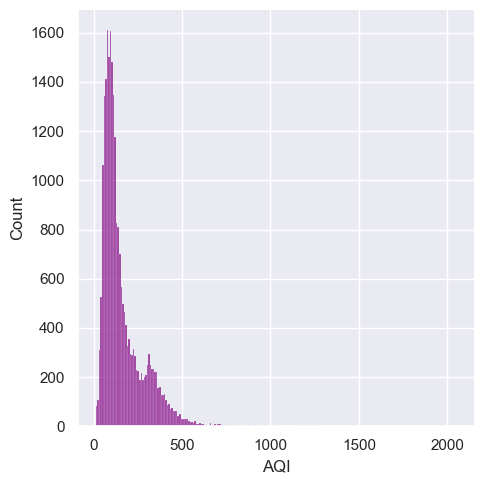

In [92]:
# distribution of aqi from 2015-2020
sns.displot(df,x='AQI',color='purple')
plt.show()

## Bivariate analysis

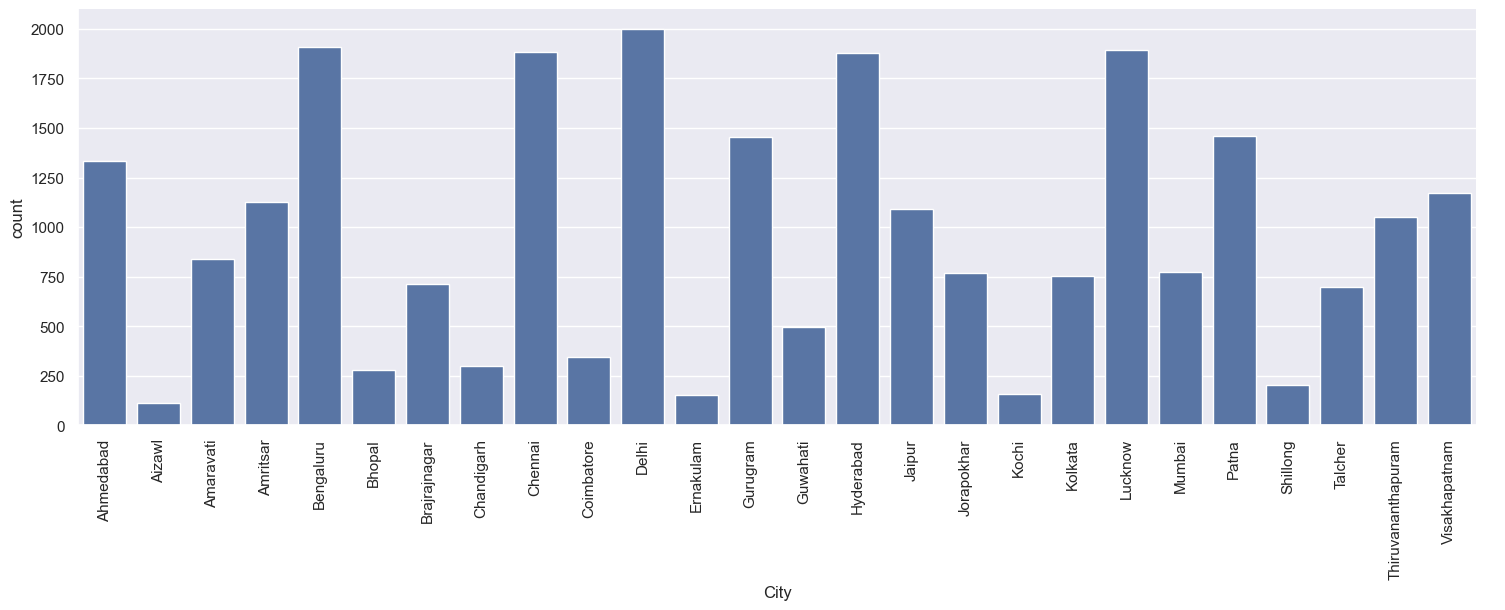

In [93]:
sns.set(style='darkgrid')
graph = sns.catplot(x='City',kind='count',data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

In [94]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [95]:
df = df.replace({
    'PM2.5' : {np.nan:67.476613},
    'PM10' : {np.nan:118.454435},
    'NO' : {np.nan:17.622421},
    'NO2' : {np.nan:28.978391},
    'NOx' : {np.nan:32.289012},
    'NH3' : {np.nan:23.848366},
    'CO' : {np.nan:2.345267},
    'SO2' : {np.nan:14.362933},
    'O3' : {np.nan:34.912885},
    'Benzene' : {np.nan:3.458668},
    'Toluene' : {np.nan:9.525714},
    'Xylene' : {np.nan:3.588683},
})

In [96]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

## Detecting Outliers and Treatment

<Axes: >

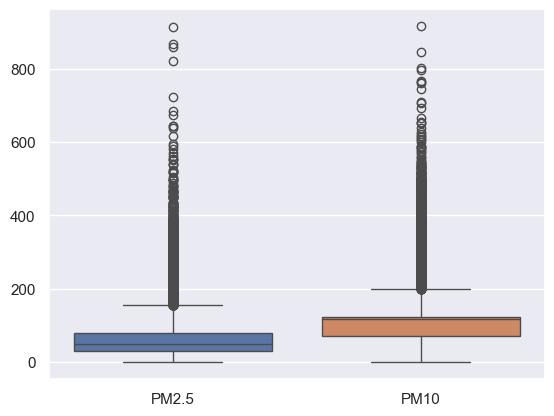

In [97]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

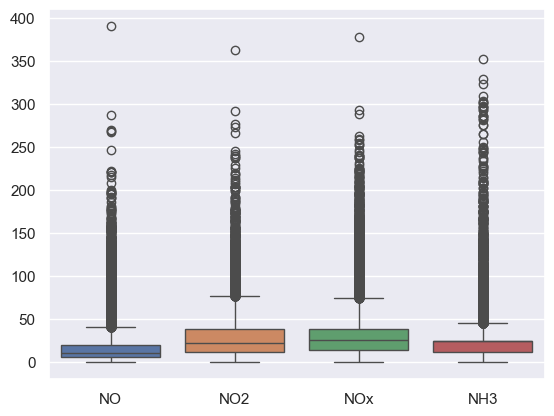

In [98]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

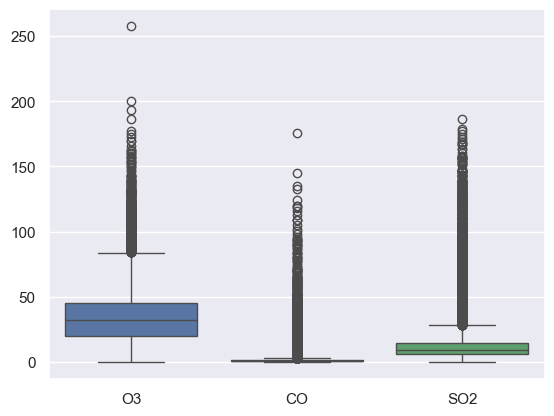

In [99]:
sns.boxplot(data=df[['O3', 'CO', 'SO2']])

<Axes: >

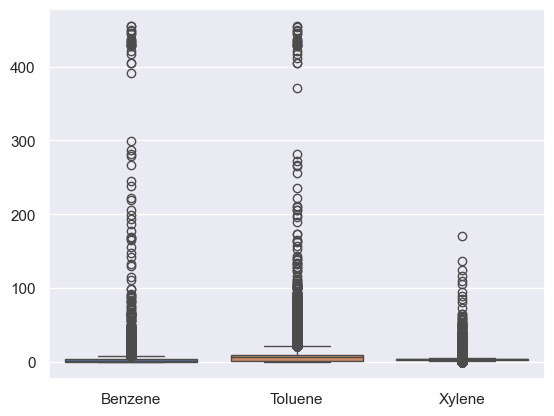

In [100]:
sns.boxplot(data=df[['Benzene', 'Toluene', 'Xylene']])

In [101]:
# interquartile range(IQR) method
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df

df = replace_outliers_with_quartiles(df)